출력 언어를 선택하세요 (한글 또는 영어):  한국


한국


분석할 국가명을 입력하세요:  독일


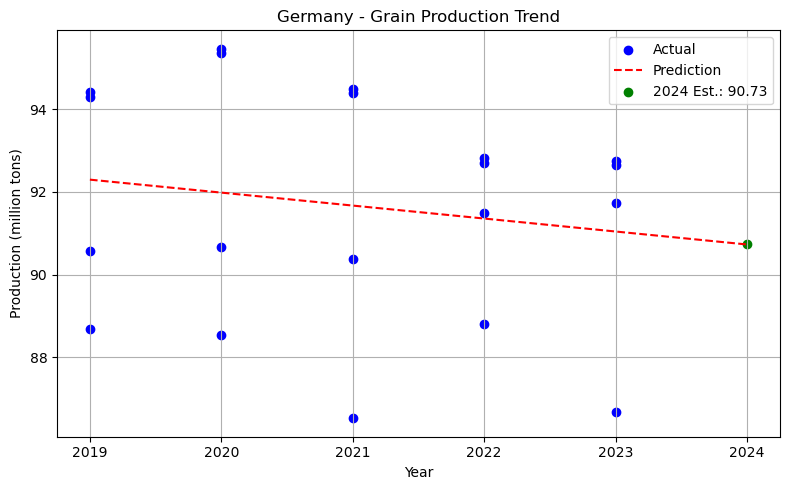


=== AI Analysis Report ===
📍 Country: Germany
📅 Period: 2019 to 2023
📈 Index trend: Decreasing
📉 Yearly change: -0.31 index/year
📊 Total change: -1.6% (94.30 → 92.76)
🔮 Predicted index in 2024: 90.73
✅ Stable trend.


In [10]:


# ┌────────────────────────────────────────────────────────────┐
# │ 📊 국가별 곡물 생산량 예측 프로그램 (FAO 데이터 기반)       │
# ├────────────────────────────────────────────────────────────┤
# │ 1. 엑셀 파일 업로드 (곡물 생산량 포함된 FAO 자료)           │
# │ 2. 언어 선택 (한글 or 영어)                                │
# │ 3. 분석할 국가명을 입력                                    │
# │ 4. 국가명 표준화 (FAO 표기로 변환)                         │
# │ 5. 해당 국가의 연도별 생산량 데이터 추출                  │
# │ 6. 선형 회귀 모델 학습 (경사 하강법)                       │
# │ 7. 다음 해 생산량 예측                                     │
# │ 8. 결과 시각화 (산점도 + 추세선)                           │
# │ 9. 분석 리포트 출력 (선택한 언어로)                        │
# └────────────────────────────────────────────────────────────┘
'''
┌──────────────────────────────┐
│       사용자 입력 수집       │
│    ┌────────────────────┐    │
│    │ 국가명 입력 (예: "한국")│
│    └─────────┬──────────┘    │
└──────────────┼──────────────┘
               ▼
     ┌────────────────────┐
     │ alias_map 통해 정규화 │
     └─────────┬──────────┘
               ▼
 ┌──────────────────────────────┐
 │   엑셀 파일에서 Area 열 검색   │
 │ df['Area'] == country → 매칭? │
 └─────────┬────────────┬───────┘
           │예          │아니오
           ▼            ▼
  ┌────────────────┐   ┌────────────────────┐
  │ 데이터 추출 및 처리 │   │ "❌ 유효한 데이터 없음" 출력 │
  └────────────────┘   └────────────────────┘

'''

# ✅ 1. Colab에서 엑셀 파일 업로드
# 사용자가 컴퓨터에서 데이터를 선택하면 Colab으로 업로드됩니다.
#from google.colab import files
#uploaded = files.upload()  # 예: '곡물생산량.xlsx'

# ✅ 2. 필요한 라이브러리 불러오기
# pandas: 표 데이터 처리, matplotlib.pyplot: 그래프 그리기
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 3. 엑셀 파일 읽기
# 업로드된 파일명을 지정합니다. 파일명은 업로드한 이름과 같아야 합니다.
excel_path = 'gggg.xlsx'
df = pd.read_excel(excel_path, engine='openpyxl')

# ✅ 4. 생산량 데이터 열 이름 지정
# FAO 데이터에서는 일반적으로 'Value'라는 열에 생산량이 들어 있습니다.
production_col = 'Value'

# ✅ 5. 사용자가 입력하는 다양한 국가명 → FAO 공식 국가명으로 바꿔주는 사전(dict)
alias_map = {
    "usa": "United States of America",
    "us": "United States of America",
    "미국": "United States of America",
    "united states": "United States of America",
    "united states of america": "United States of America",

    "korea": "Republic of Korea",
    "south korea": "Republic of Korea",
    "대한민국": "Republic of Korea",
    "republic of korea": "Republic of Korea",

    "uk": "United Kingdom of Great Britain and Northern Ireland",
    "영국": "United Kingdom of Great Britain and Northern Ireland",
    "united kingdom": "United Kingdom of Great Britain and Northern Ireland",

    "japan": "Japan",
    "nippon": "Japan",
    "일본": "Japan",

    "germany": "Germany",
    "독일": "Germany",
    "deutschland": "Germany"
}

# ✅ 6. 사용자 입력 국가명 정리 함수
# 소문자로 바꾸고 사전에 매핑된 값을 반환합니다.
def resolve_country_name(user_input):
    normalized = user_input.strip().lower()
    return alias_map.get(normalized, user_input.strip())

# ✅ 7. 언어 선택 (한글 또는 영어)
lang = input("출력 언어를 선택하세요 (한글 또는 영어): ").strip().lower()
# '한글', '한', 'korean' 등의 다양한 표현을 포괄적으로 허용
# 한글로 시작하면 True
print(lang)
use_korean = lang in ['한글', '한', 'korean', '한국어']


# ✅ 8. 사용자로부터 분석할 국가명을 입력 받음
user_input = input("분석할 국가명을 입력하세요: ")
country = resolve_country_name(user_input)

# ✅ 9. 해당 국가의 데이터만 필터링
df_country = df[df['Area'] == country][['Year', production_col]].dropna()

# ✅ 10. 유효한 데이터가 없으면 종료
if df_country.empty:
    print(f"⚠️ '{country}'에 대한 유효한 데이터를 찾을 수 없습니다.")
else:
    # ✅ 연도는 정수형, 생산량은 실수형으로 변환하고 단위는 '백만 톤' 임(원래 엑셀이 있는 단위가 백만임)
    df_country['Year'] = df_country['Year'].astype(int)
    df_country['Production'] = df_country[production_col].astype(float) # (원래 백만이라서 나눌 필요가 없음)

    # ✅ 기준 연도를 가장 오래된 연도로 설정하고 상대 연도 계산
    base_year = df_country['Year'].min()
    x = df_country['Year'] - base_year
    y = df_country['Production']

    # ✅ 경사 하강법 함수 정의 (직선을 학습하기 위한 간단한 선형 회귀 방법)
    def gradient_descent(x, y, lr=0.01, epochs=10000):
        m, b = 0.0, 0.0  # 초기값: 기울기 m, 절편 b
        n = len(x)
        for _ in range(epochs):
            pred = m * x + b
            error = y - pred
            dm = -2 * (x * error).sum() / n
            db = -2 * error.sum() / n
            m -= lr * dm
            b -= lr * db
        return m, b

    # ✅ 경사 하강법을 사용하여 직선 학습 후 예측값 계산
    slope, intercept = gradient_descent(x, y)
    last_year = df_country['Year'].max()
    predict_year = last_year + 1
    x_pred = predict_year - base_year
    y_pred = slope * x_pred + intercept

    # ✅ 11. 그래프 시각화
    plt.figure(figsize=(8, 5))
    plt.scatter(df_country['Year'], y, color='blue', label='Actual')  # 실제 데이터 점

    plt.plot(range(base_year, predict_year + 1),
             [slope * (i - base_year) + intercept for i in range(base_year, predict_year + 1)],
             color='red', linestyle='--', label='Prediction')  # 예측 선
    plt.scatter(predict_year, y_pred, color='green', label=f'{predict_year} Est.: {y_pred:.2f}')  # 예측 점

    # ✅ 축과 제목 설정
    plt.xlabel('Year')  # x축 이름
    plt.ylabel('Production (million tons)')  # y축 이름
    plt.title(f'{country} - Grain Production Trend')  # 그래프 제목
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ✅ 12. 분석 리포트 출력
    start_val = y.iloc[0]
    end_val = y.iloc[-1]
    diff_pct = ((end_val - start_val) / start_val) * 100 if start_val != 0 else 0
    trend = "Increasing" if slope > 0 else "Decreasing"

    if use_korean:
        print("\n🧠 AI 분석 리포트")
        print("────────────────────────────")
        print(f"📍 분석 국가: {country}")
        print(f"📅 분석 기간: {base_year}년 ~ {last_year}년")
        print(f"📈 생산 지수 추세: {'증가' if slope > 0 else '감소'}")
        print(f"📉 연평균 변화량: {slope:.2f} 지수/년")
        print(f"📊 총 변화율: {diff_pct:.1f}% ({start_val:.2f} → {end_val:.2f})")
        print(f"🔮 예측된 {predict_year}년 생산 지수: {y_pred:.2f}")
        if slope > 0.5:
            print("⚠️ 빠르게 증가하는 추세입니다. 지속 가능성에 대한 검토가 필요합니다.")
        elif slope < -0.5:
            print("⚠️ 급격한 감소 추세입니다. 식량 안보 대책이 필요할 수 있습니다.")
        else:
            print("✅ 완만한 변화입니다. 현재로서는 안정적인 추세로 보입니다.")
        print("────────────────────────────")
    else:
        print("\n=== AI Analysis Report ===")
        print(f"📍 Country: {country}")
        print(f"📅 Period: {base_year} to {last_year}")
        print(f"📈 Index trend: {trend}")
        print(f"📉 Yearly change: {slope:.2f} index/year")
        print(f"📊 Total change: {diff_pct:.1f}% ({start_val:.2f} → {end_val:.2f})")
        print(f"🔮 Predicted index in {predict_year}: {y_pred:.2f}")
        if slope > 0.5:
            print("⚠️ Rapid increase. Check for sustainability.")
        elif slope < -0.5:
            print("⚠️ Rapid decrease. Food security actions may be needed.")
        else:
            print("✅ Stable trend.")
        print("===========================")
